**Scenario**
I am junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. 
The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. 
Therefore, wants to understand how casual riders and annual members use Cyclistic bikes differently.


**Characters and teams**

● Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with
disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about
8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day.

● Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.

● Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy
learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic
achieve them.

● Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.

**About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.

One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Moreno has assigned us a question to answer:**

***How do annual members and casual riders use Cyclistic bikes differently?***

**For this analysis purpose i am using public data available for cyclistic from January 2022 to December 2022.
I already checked data in microsoft excel and all monthly csv has same and consistent data in them so we can merge all 12 months data into one big whole year data.**

In [1]:
# Load packages 
library(dplyr)
library(tidyr)
library(tidyverse)
library(skimr)
library(janitor)
library(ggplot2)
library(scales)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



In [2]:
# Import 12 months csv files from january to december 2022

jan22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202201.csv")
feb22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202202.csv")
mar22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202203.csv")
apr22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202204.csv")
may22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202205.csv")
jun22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202206.csv")
jul22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202207.csv")
aug22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202208.csv")
sep22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202209.csv")
oct22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202210.csv")
nov22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202211.csv")
dec22 <- read.csv("/kaggle/input/google-data-analytics-capstone-case-study-1/202212.csv")

In [3]:
# Combine 12 months data to a year data 

trips22 <- rbind(jan22, feb22, mar22, apr22, may22, jun22, jul22, aug22, sep22, oct22, nov22, dec22)


In [4]:
# take a glimpse of data
glimpse(trips22)


Rows: 5,667,717
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <chr> "2022-01-13 11:59:47", "2022-01-10 08:41:56", "2022…
$ ended_at           <chr> "2022-01-13 12:02:44", "2022-01-10 08:46:17", "2022…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_cas

In [5]:
# change started_at and ended_at datatype from character to date time

trips22$started_at = strptime(trips22$started_at,"%Y-%m-%d %H:%M:%S") 
trips22$ended_at = strptime(trips22$ended_at,"%Y-%m-%d %H:%M:%S")


In [6]:
# create column to calculate trip length in minutes

trips22 <- mutate(trips22,triplength=difftime(ended_at,started_at, units = "mins"))


In [7]:
# create column to get month of a trip

trips22<-mutate(trips22,month=months(started_at))


In [8]:
# create column to get weekday of a trip

trips22<- mutate(trips22, weekday = weekdays(started_at))

In [9]:
# remove trips less than or equal to 0 and also remove trips with no start station name or end station name

trips22<- subset(trips22,triplength > 0)
trips22 <- (filter(trips22, !(end_station_name =="" | start_station_name == "")))


In [10]:
# set the order of weekdays and months

trips22$weekday <- ordered(trips22$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

trips22$month <- ordered(trips22$month, levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

In [11]:
# total trips by customer type and average length of a trip

total_trips <- trips22 %>% 
  group_by(member_casual) %>% 
  summarise(number_of_rides = n(),  '%' = (length(ride_id) / nrow(trips22)) * 100, average_duration = mean(triplength)) 


In [12]:
View(total_trips)

member_casual,number_of_rides,%,average_duration
<chr>,<int>,<dbl>,<drtn>
casual,1758047,40.23864,23.99450 mins
member,2611005,59.76136,12.45238 mins


As we can see almost 60% of total trips are of members

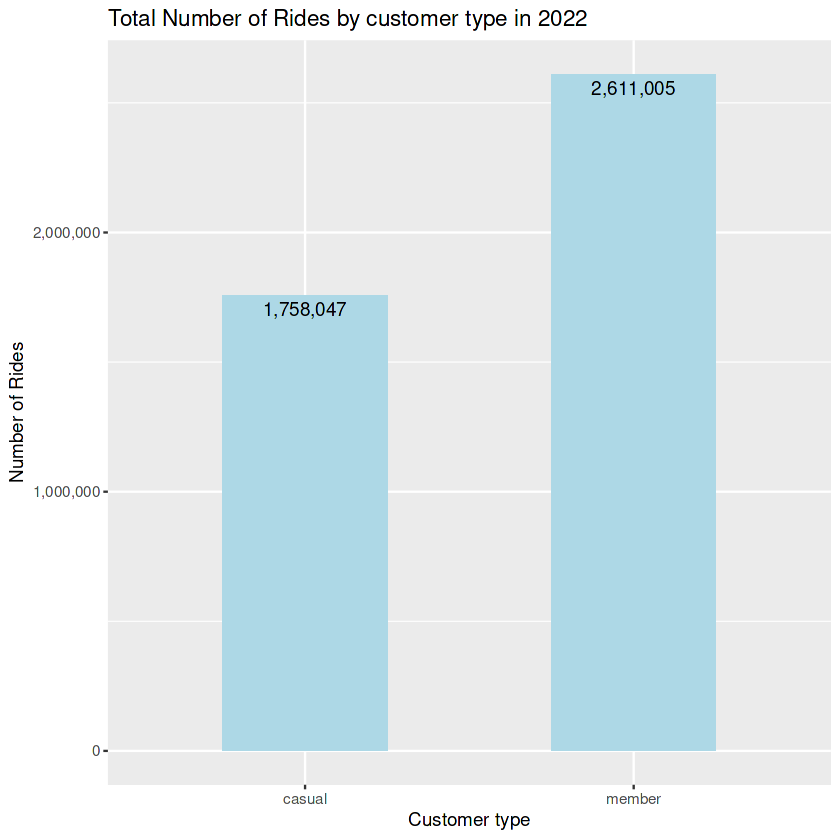

In [13]:
total_trips %>%
  ggplot(aes(x = member_casual, y = number_of_rides)) +
  geom_col(position = "dodge", width = .5, fill = "lightblue") +
  geom_text(aes(label = scales::comma(number_of_rides), vjust = 1.5)) +
  scale_y_continuous(labels = comma, breaks = seq(0,4000000,1000000)) +
  labs(title="Total Number of Rides by customer type in 2022",
       x = "Customer type", y = "Number of Rides")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


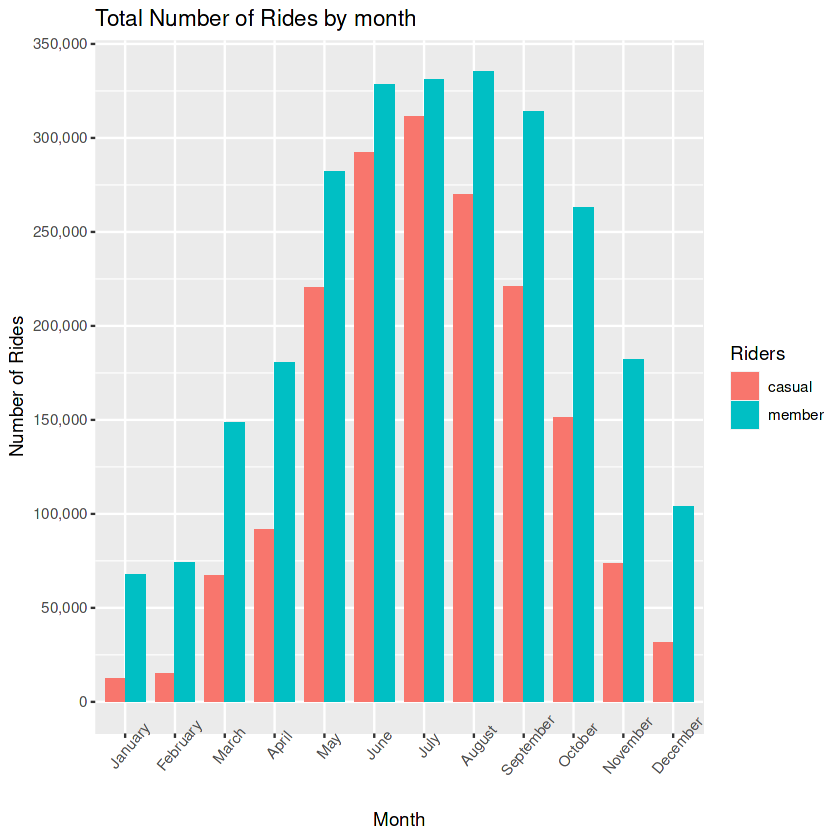

In [14]:
# Total Number of Rides by month

trips22 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(), average_length = mean(triplength)) %>%
  arrange (month) %>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  scale_y_continuous(labels = comma, breaks = seq(0,600000,50000)) +
  geom_col(position = "dodge", width = .80)+
  labs(title="Total Number of Rides by month",
  x = "Month", y = "Number of Rides") + labs( fill = "Riders") +
  theme(axis.text.x = element_text(angle = 50))


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


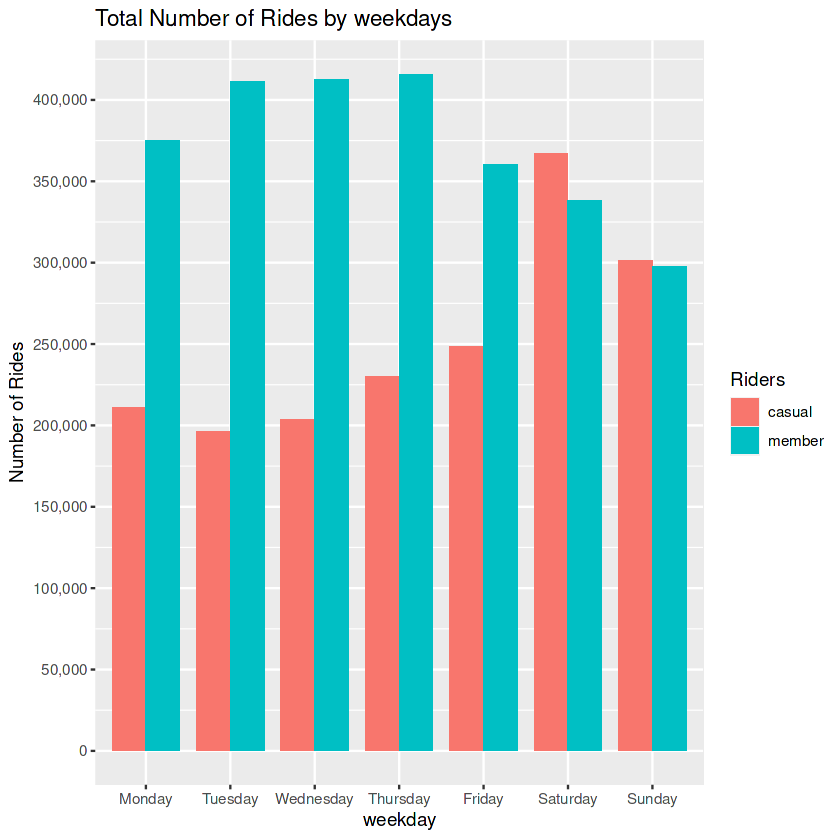

In [15]:
# Total Number of Rides by weekdays

trips22 %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_length = mean(triplength)) %>%
  ggplot(aes(x = weekday,  y = number_of_rides, fill = member_casual)) +
  scale_y_continuous(labels = comma, breaks = seq(0,600000,50000)) +
  geom_col(position = "dodge", width = .80)+
  labs(title="Total Number of Rides by weekdays",
       x = "weekday", y = "Number of Rides") + labs( fill = "Riders")


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


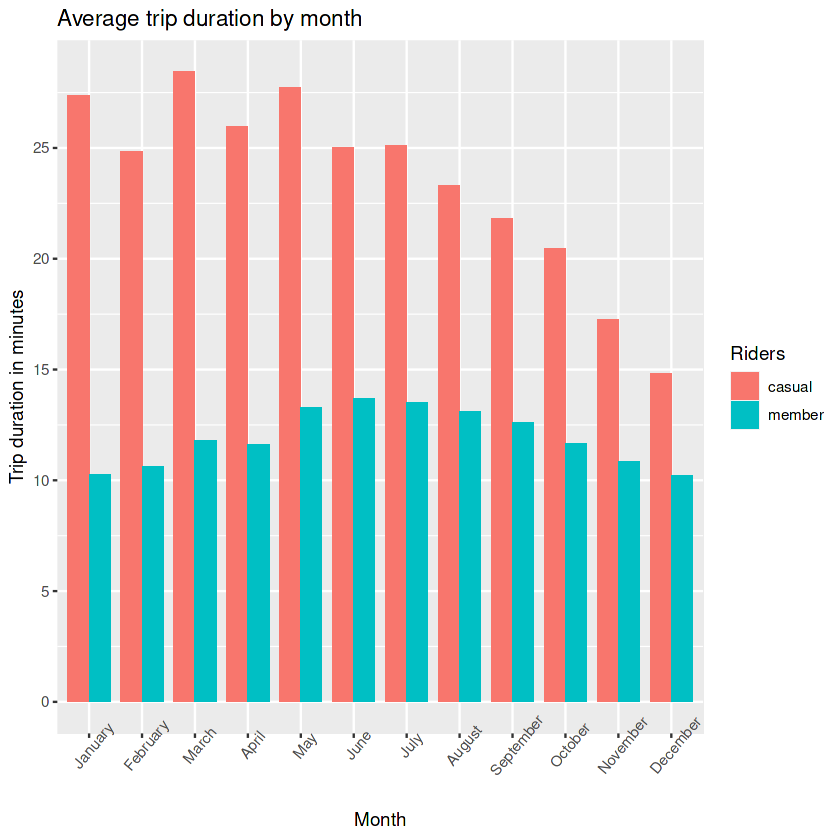

In [16]:
# Average trip duration by month

trips22 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(), average_length = mean(triplength)) %>%
  arrange (month) %>%
  ggplot(aes(x = month, y = average_length, fill = member_casual)) +
  scale_y_continuous(labels = comma, breaks = seq(0,30,5)) +
  geom_col(position = "dodge", width = .80)+
  labs(title="Average trip duration by month",
       x = "Month", y = "Trip duration in minutes") + labs( fill = "Riders") +
  theme(axis.text.x = element_text(angle = 50))


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


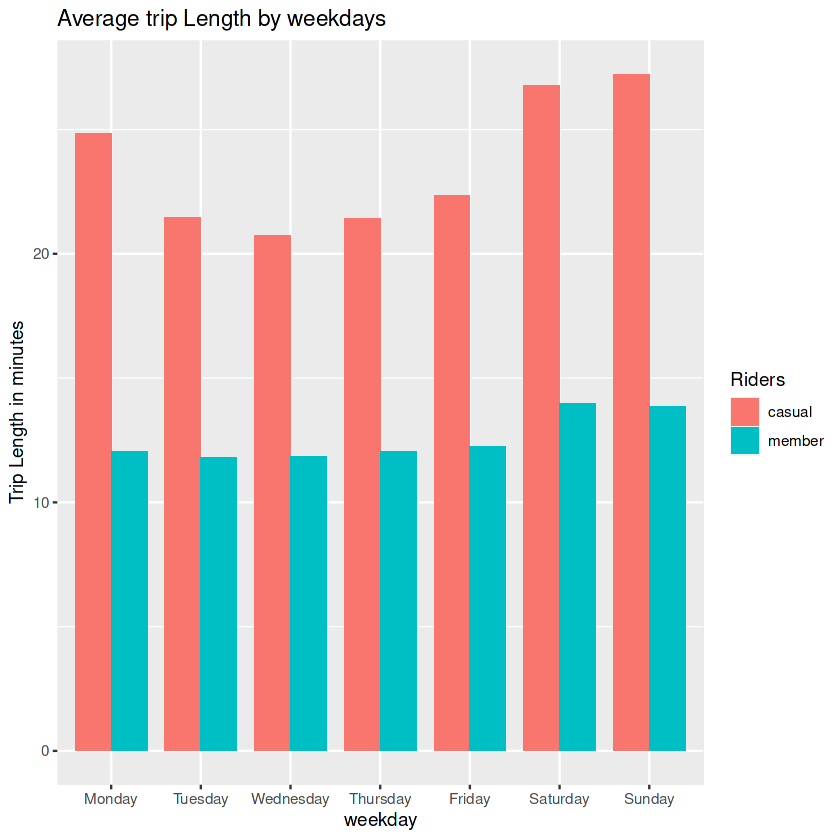

In [17]:
# Average trip Length by weekdays

trips22 %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_length = mean(triplength)) %>%
  ggplot(aes(x = weekday,  y = average_length, fill = member_casual)) +
  scale_y_continuous(labels = comma, breaks = seq(0,60,10)) +
  geom_col(position = "dodge", width = .80)+
  labs(title="Average trip Length by weekdays",
       x = "weekday", y = "Trip Length in minutes") + labs( fill = "Riders")


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


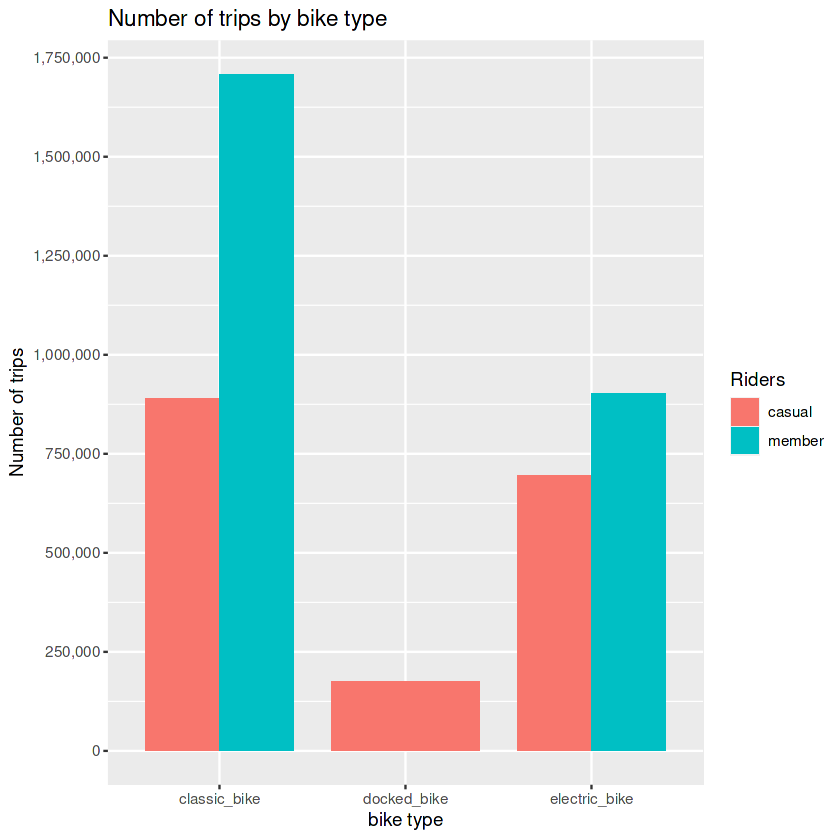

In [18]:
# Number of trips by bike type 

trips22 %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_rides = n()) %>%
  arrange (rideable_type) %>%
  ggplot(aes(x = rideable_type, y = number_of_rides, fill = member_casual)) +
  scale_y_continuous(labels = comma, breaks = seq(0,2000000,250000)) +
  geom_col(position = "dodge", width = .80)+
  labs(title="Number of trips by bike type",
       x = "bike type", y = "Number of trips") + labs( fill = "Riders")


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


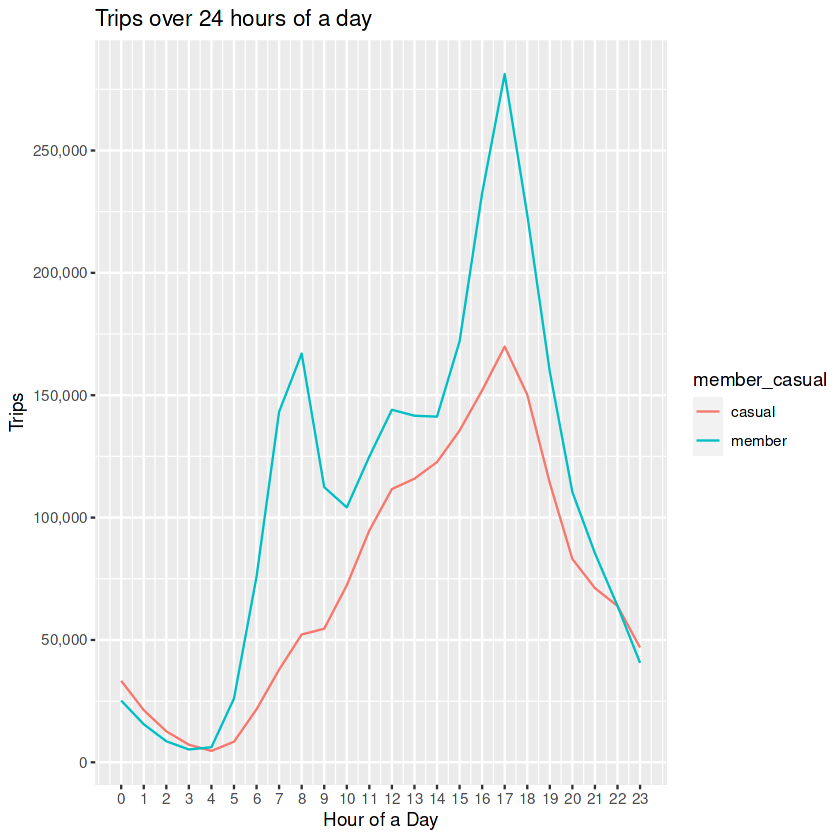

In [19]:
trips22 %>% 
  mutate(hour = hour(started_at)) %>% 
  group_by(member_casual, hour) %>% 
  summarise(no._of_trips = n(),average_duration = mean(triplength)) %>% 
  arrange(member_casual, hour)  %>% 
  ggplot(aes(x = hour, y = no._of_trips, fill = member_casual, color = member_casual)) +
  scale_y_continuous(labels = comma, breaks = seq(0,400000,50000))+
  scale_x_continuous(breaks = seq(0,23,1))+
  geom_line()+
  labs( title = "Trips over 24 hours of a day", x= "Hour of a Day", y = "Trips")

**Findings**

* In 2022 60% of total trips are made by members and 40% by casual riders.
* Summer months from may to october are the busiest months for both members and casual riders.
* member rides are more during weekdays compare to weekends, while casual rides are more during weekends compare to weekdays.
* Average trip duration of casual riders are significantly more than that of members.
* Members prefer classic bikes over electric bikes also docked bikes are only used by casual riders
* Members rides are more in mornings and late afternoon as they use bikes mostly for their commute to work, while Casual riders have more rides at late afternoon between 4pm to 6pm.


**Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members.**

**Recommendations**

*  To convert casual riders into members we need more information on pricing for single rides, full day passes and annual membership.Also more details for casual riders like how much each casual riders are spending on rides every year to know whether membership will help riders to save money with added benefits as member.

* Run digital marketing campaign at top staions during busy time showing benefits of annual membership and also how bike riding helps our planet, health benefits and avoid traffic.

* Increase discounts and benefits during slower months.

